<a href="https://colab.research.google.com/github/sachinkun21/customer_segmentation/blob/master/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The most successful companies today are the ones that know their customers so well that they can anticipate their needs. Data analysts play a key role in unlocking these in-depth insights, and segmenting the customers to better serve them. In this course, you will learn real-world techniques on customer segmentation and behavioral analytics, using a real dataset containing anonymized customer transactions from an online retailer. You will first run cohort analysis to understand customer trends. You will then learn how to build easy to interpret customer segments. On top of that, you will prepare the segments you created, making them ready for machine learning. Finally, you will make your segments more powerful with k-means clustering, in just few lines of code! By the end of this course, you will be able to apply practical customer behavioral analytics and segmentation techniques.

In [1]:
ls

online.csv  sample_data/


In [0]:
import pandas as pd
import numpy as np


In this Section, we will perform Time Cohort Analysis.
Time base Cohorts group the customer by the time they completed their first activity.

In this analysis, We will:
- segment customers into cohorts based on the month they made thier first purchase in.
-  We will then assign a cohort index to each purchase of a customer. i.e we will mark each transaction based on it's relative time period since it's first purchase.
- In this analysis, we will calculate the number of months since acquistion and will call it cohort index.
- The cohort index will represent the number of months since the first transaction of the Customer.
- In the next step, we will calculate metrics such as retention  or average spend value and build a Heatmap using it.

#### For example given below:


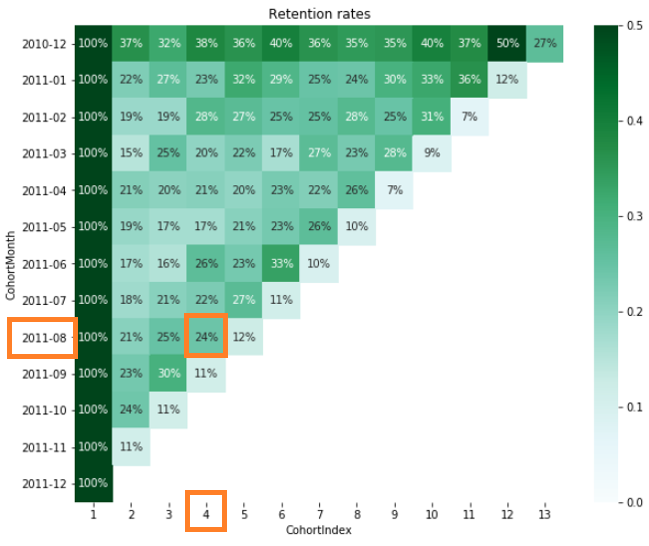


The column highlighted in Orange with value as 24% represents, 24% of cohorts which signed in August 2011 were active 4 months later.

Can you see the 100% value in all cells in column 1. It's because this was the month when customer signed up or did their first purchase. So it's obvious that it will have rate of 100% activity.

#### About the dataset.
We will use the dataset provided by UCI machine Learning Laboratory.
It has around 0.5 million records of a UK based online firm and contains realistic customer Transaction information in a commonly used format in Industry.

let's load the data and take a look at first 5 rows of it:

In [3]:
df = pd.read_csv('online.csv', parse_dates=['InvoiceDate'], index_col='Unnamed: 0')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom


The dataset contains 7 columns for each customer transaction representing variuos features of a transaction.

For time cohort analysis, we will use:
- DateTime column
- Price Column
- CustomerID column.

The dataset has already been loaded. Let's create a `Cohort Table` for time based cohort Analysis.





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70864 entries, 416792 to 312243
Data columns (total 8 columns):
InvoiceNo      70864 non-null int64
StockCode      70864 non-null object
Description    70864 non-null object
Quantity       70864 non-null int64
InvoiceDate    70864 non-null datetime64[ns]
UnitPrice      70864 non-null float64
CustomerID     70864 non-null int64
Country        70864 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 4.9+ MB


### Step 1: Let's extract the Month of the Purchase of each transaction.

#### First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [0]:
# importing DateTime module to convert extracted dates
import datetime as dt

# Defining the function that will parse the date and return 1st day of respective month
def extract_month(date_value):
  return dt.datetime(date_value.year, date_value.month, 1)

#### Now we will use the function created above to convert all the invoice dates into respective month date format.

In [6]:
# Creating InvoiceMonth column using the function created in previous step
df['InvoiceMonth'] = df['InvoiceDate'].apply(extract_month) 
df[['InvoiceDate','InvoiceMonth']].head()

,InvoiceDate,InvoiceMonth
416792,2011-10-25 08:26:00,2011-10-01
482904,2011-11-20 11:56:00,2011-11-01
263743,2011-07-14 13:35:00,2011-07-01
495549,2011-11-23 15:53:00,2011-11-01
204384,2011-05-25 13:36:00,2011-05-01


### Step 2: Now we will use the Invoice Month created in step1 to generate cohort Date values

####  Creating a groupby object with respect to CustomerID variable, and selecting InvoiceDay for further calculations.

In [0]:
group = df.groupby('CustomerID')['InvoiceMonth']

You can uncomment and execute the following code block to see the groups.

In [0]:
# for key, item in group:
#     print(group.get_group(key), "\n\n")

#### Now let's assign the acquistion Cohort value to each transaction based on the minimum value of InvoiceMonth of the group it belongs to.

In [15]:
df['CohortMonth'] = group.transform('min')
df[['CustomerID','InvoiceDate','InvoiceMonth', 'CohortMonth']].head()

,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth
416792,14286,2011-10-25 08:26:00,2011-10-01,2011-04-01
482904,16360,2011-11-20 11:56:00,2011-11-01,2011-09-01
263743,13933,2011-07-14 13:35:00,2011-07-01,2011-07-01
495549,17290,2011-11-23 15:53:00,2011-11-01,2011-11-01
204384,17663,2011-05-25 13:36:00,2011-05-01,2011-02-01


To read how transform works on group by object click on the link here https://pbpython.com/pandas_transform.html

### Step 3: Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.

First, we will create 4 variables that capture the integer value of years, months  for Invoice and Cohort Date using the get_date_int() function given below:



In [0]:
def parse_dates_int(date_column):
    year = date_column.dt.year
    month = date_column.dt.month
    
    return year, month


#### Now, We will use this function to extract the integer values for Invoice as well as Cohort Date in 3 seperate series for each of the two columns


In [20]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month = parse_dates_int(df['InvoiceDate'])

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month = parse_dates_int(df['CohortMonth'])

# Printing top 5 of each series
cohort_year.head(), cohort_month.head()

(416792    2011
 482904    2011
 263743    2011
 495549    2011
 204384    2011
 Name: CohortMonth, dtype: int64, 416792     4
 482904     9
 263743     7
 495549    11
 204384     2
 Name: CohortMonth, dtype: int64)

Now, we have 4  pandas series containing year, month and day values for Invoice and Cohort dates columns as: - **invoice_year, cohort_year, invoice_month and cohort_month** respectively.

#### We will use these integer values extracted above to calculate business metrics for our time cohorts:
- We will calculate the difference between the Invoice Dates and Cohort dates in years, months separately.
- then calculate the total Months difference between the two. 
- This will be our Months offset or cohort Index, which we will use in the next section to calculate retention rate.

In [0]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
# days_diff = invoice_day - cohort_day

# Using the variables created above to calcualte the difference in days and storing them in cohort Index column
df['CohortIndex'] = years_diff * 12 + months_diff+ 1

In [22]:
df[['CustomerID','InvoiceDate','InvoiceMonth', 'CohortMonth', 'CohortIndex']].head()

,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth,CohortIndex
416792,14286,2011-10-25 08:26:00,2011-10-01,2011-04-01,7
482904,16360,2011-11-20 11:56:00,2011-11-01,2011-09-01,3
263743,13933,2011-07-14 13:35:00,2011-07-01,2011-07-01,1
495549,17290,2011-11-23 15:53:00,2011-11-01,2011-11-01,1
204384,17663,2011-05-25 13:36:00,2011-05-01,2011-02-01,4


We have  assigned the Monthly time offset i.e Cohort Index to each transaction and ready to use it for running daily cohort analysis!

### Step 4: Calculating Retention Count: 
The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.

In the this section, we will calculate retention count for each cohort Month paired with cohort Index

#### First, We will group by our dataset with respect to CohortMonth and CohortIndex first

In [42]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

# printing len of group by object
len(grouping)

91

#### Now we will count number of unique customer Id's falling in each group of CohortMonth and CohortIndex.
This will give us number of customers(Retained Customers) from  each cohort who bought items after a n Months where n is CohortIndex.

and store them in a new dataframe cohort Data.

In [0]:
# Count the number of unique values per customer ID
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data.columns = ['CohortMonth',	'CohortIndex',	'Count of unique CustomerID']


In [44]:
cohort_data.head()

,CohortMonth,CohortIndex,Count of unique CustomerID
0,2010-12-01,1,716
1,2010-12-01,2,246
2,2010-12-01,3,221
3,2010-12-01,4,251
4,2010-12-01,5,245


#### Retention Rate calculation:
Now that we have count of retained customer for each cohortMonth and cohortIndex
let's convert it into suitable format for readability and Calulation of retention Rate for each Cohort

In [46]:
# Creating new dataframe with index as CohortMonth, columns as Cohort indexes and Values as Count
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Count of unique CustomerID')

# Printing top 5 rows of Pivoted dataframe
cohort_counts.head()


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN


#### Now we will use the the Cohort Count dataframe to calculate the retention rate
- We will store the 1st column as Cohort size i.e total Number of Customers in that Cohort
- We will divide the values in other columns with Cohort Size in order to calculate the retention rate i.e Number of Customers in Each Cohort Index

In [48]:
# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,1.0,0.343575,0.308659,0.350559,0.342179,0.398045,0.347765,0.329609,0.335196,0.370112,0.354749,0.486034,0.240223
2011-01-01,1.0,0.207831,0.246988,0.243976,0.331325,0.271084,0.246988,0.259036,0.313253,0.307229,0.373494,0.135542,NaN
2011-02-01,1.0,0.183544,0.180380,0.262658,0.268987,0.234177,0.253165,0.262658,0.272152,0.300633,0.088608,NaN,NaN
2011-03-01,1.0,0.162371,0.257732,0.195876,0.213918,0.172680,0.252577,0.219072,0.275773,0.097938,NaN,NaN,NaN
2011-04-01,1.0,0.192157,0.203922,0.192157,0.184314,0.203922,0.219608,0.231373,0.066667,NaN,NaN,NaN,NaN


In [0]:
cohort_sizes.head()